# Importing Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# allowing charts to be displayed
%matplotlib inline

In [3]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 6/Boat Dashboard'

In [4]:
# importing data
df_boat = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boat_cleaned2.csv'), index_col = False)

## Cleaning Data for Analysis

In [5]:
df_boat.columns

Index(['Unnamed: 0', 'Country', 'Currency', 'Price in EUR', 'Manufacturer',
       'Boat Type', 'Condition Type', 'Propulsion Type', 'Year Built',
       'Material', 'Length', 'Width', 'Number of Views Last 7 Days'],
      dtype='object')

In [6]:
# removing Unnamed column that sometimes pops up
df_boat = df_boat.drop(columns = 'Unnamed: 0')

In [7]:
df_boat.head()

,Country,Currency,Price in EUR,Manufacturer,Boat Type,Condition Type,Propulsion Type,Year Built,Material,Length,Width,Number of Views Last 7 Days
0,Switzerland,CHF,3476,Rigiflex power boats,Motor Yacht,New Boat From Stock,NaN,2017,NaN,4.00,1.90,226
1,Germany,EUR,3490,Terhi power boats,Center console boat,New Boat From Stock,NaN,2020,Thermoplastic,4.00,1.50,75
2,Denmark,DKK,3472,Pioner power boats,Sport Boat,New Boat From Stock,NaN,2020,NaN,3.00,1.00,64
3,Germany,EUR,3399,Linder power boats,Fishing Boat,New Boat From Stock,NaN,2019,Aluminium,3.55,1.46,58
4,Switzerland,CHF,3750,NaN,Catamaran,Used Boat,Unleaded,1999,Aluminium,6.20,2.38,474


In [8]:
df_boat.shape

(9234, 12)

In [9]:
# checking for duplicates
df_dups = df_boat[df_boat.duplicated()]

In [10]:
# checking work
df_dups.shape

(0, 12)

In [11]:
# checking for null values
df_boat.isnull().sum()

Country                           0
Currency                          0
Price in EUR                      0
Manufacturer                   1263
Boat Type                         0
Condition Type                   79
Propulsion Type                2027
Year Built                        0
Material                       1626
Length                            0
Width                             0
Number of Views Last 7 Days       0
dtype: int64

In [12]:
df_boat.isnull().sum().sum()

4995

In [13]:
# replacing missing values with NaN
df_boat = df_boat.fillna(value = 'NaN')

In [14]:
# checking work
df_boat.isnull().sum()

Country                        0
Currency                       0
Price in EUR                   0
Manufacturer                   0
Boat Type                      0
Condition Type                 0
Propulsion Type                0
Year Built                     0
Material                       0
Length                         0
Width                          0
Number of Views Last 7 Days    0
dtype: int64

Note: the exercise notebook used distplot, however this refused to work even in simple versions, and after some research it seems distplot is outdated and now histplot is recommended as a replacement.

(0.0, 5000.0)

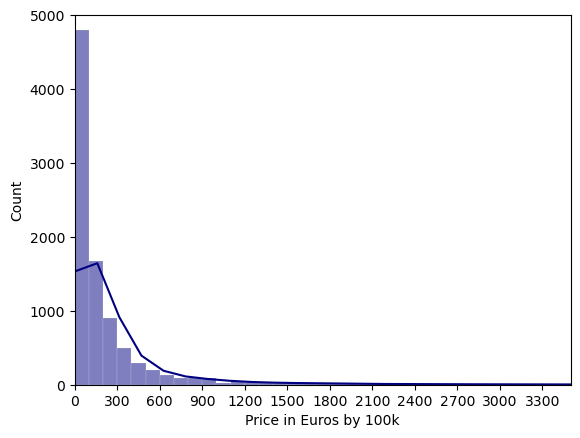

In [15]:
# checking for extreme values with a histogram

# Set the bin size and range
bin_size = 100000
x_range = range(0, 3500000, bin_size)

# Create the histogram
sns.histplot(df_boat['Price in EUR'], bins=x_range, kde=True, color='navy', edgecolor='white')

# Set x-axis label
plt.xlabel('Price in Euros by 100k')

# Set x-axis ticks every 20,000 with shortened "20" labels
x_ticks = range(0, 3500000, 300000)
x_tick_labels = [str(x // 1000) for x in x_ticks]

# Adjust the x-axis tick positions and labels
plt.xticks(x_ticks, x_tick_labels)

# Set x-axis range limit
plt.xlim(0, 3500000)
plt.ylim(0, 5000)

In [16]:
# checking the mean, median, and max of the price variable
df_boat['Price in EUR'].mean()

302189.7995451592

In [17]:
df_boat['Price in EUR'].median()

95851.0

In [18]:
df_boat['Price in EUR'].max()

31000000

## Exploring Data Visually and Prepping Variables for Analysis

Note: Looking at the research questions there are two that could work for this task.


1) Does price affect popularity in online traffic?

Variables for this are price and views. The price is the independant variable and views are the dependant.

2) Does boat size have an impact on popularity?

Variables for this include width, length, and views. Total views is the dependant variable and width/length are independant variables. Since there are two independant variables I will split this up into a part A and part B.

### 1. Does price affect popularity in online traffic?

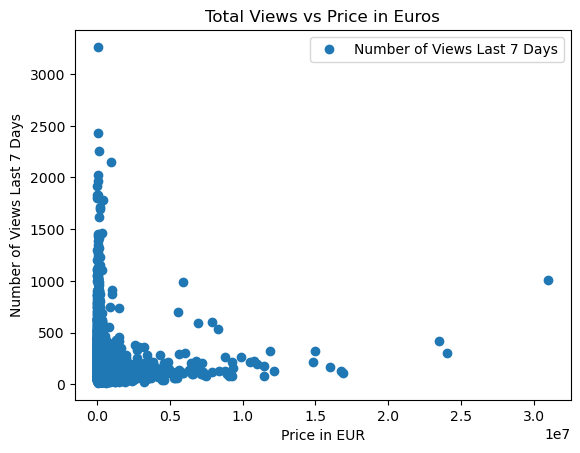

In [19]:
# creating a scatterplot comparing price and views

df_boat.plot(x='Price in EUR', y='Number of Views Last 7 Days', style='o')
plt.title('Total Views vs Price in Euros')
plt.xlabel('Price in EUR')
plt.ylabel('Number of Views Last 7 Days')
plt.show()

In [20]:
# reshaping the variables into NumPy arrays and put them into separate objects.

X = df_boat['Price in EUR'].values.reshape(-1,1)
y = df_boat['Number of Views Last 7 Days'].values.reshape(-1,1)

In [21]:
X

array([[3476],
       [3490],
       [3472],
       ...,
       [4499],
       [4300],
       [3938]])

In [22]:
y

array([[226],
       [ 75],
       [ 64],
       ...,
       [354],
       [266],
       [194]])

In [23]:
# splitting data into training set and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 2.A Does boat size have an impact on popularity? - Width

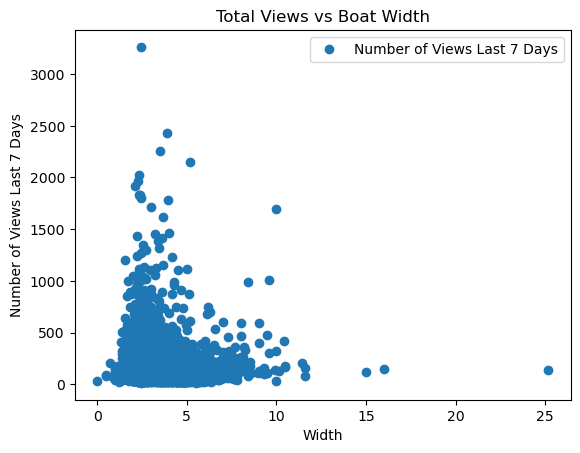

In [24]:
# creating a scatterplot comparing views and width

df_boat.plot(x='Width', y='Number of Views Last 7 Days', style='o')
plt.title('Total Views vs Boat Width')
plt.xlabel('Width')
plt.ylabel('Number of Views Last 7 Days')
plt.show()

In [25]:
# reshaping the variables into NumPy arrays and put them into separate objects.

X2 = df_boat['Width'].values.reshape(-1,1)
y2 = df_boat['Number of Views Last 7 Days'].values.reshape(-1,1)

In [26]:
X2

array([[1.9 ],
       [1.5 ],
       [1.  ],
       ...,
       [1.8 ],
       [1.89],
       [1.6 ]])

In [27]:
y2

array([[226],
       [ 75],
       [ 64],
       ...,
       [354],
       [266],
       [194]])

In [28]:
# splitting data into training set and testing set

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

### 2.B Does boat size have an impact on popularity? - Length

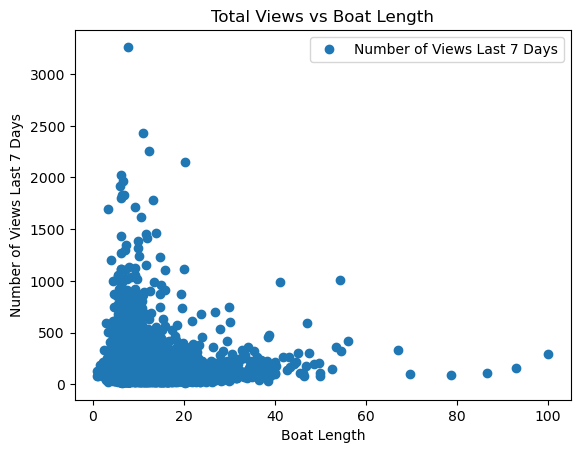

In [29]:
# creating a scatterplot comparing views and length

df_boat.plot(x='Length', y='Number of Views Last 7 Days', style='o')
plt.title('Total Views vs Boat Length')
plt.xlabel('Boat Length')
plt.ylabel('Number of Views Last 7 Days')
plt.show()

In [30]:
# reshaping the variables into NumPy arrays and put them into separate objects.

X3 = df_boat['Length'].values.reshape(-1,1)
y3 = df_boat['Number of Views Last 7 Days'].values.reshape(-1,1)

In [31]:
X3

array([[4.  ],
       [4.  ],
       [3.  ],
       ...,
       [4.4 ],
       [4.37],
       [3.6 ]])

In [32]:
y3

array([[226],
       [ 75],
       [ 64],
       ...,
       [354],
       [266],
       [194]])

In [33]:
# splitting data into training set and testing set

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

## Regression Analysis

### 1. Does price affect popularity in online traffic?

In [34]:
# creating a regression object.

regression = LinearRegression()

In [35]:
# fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# predicting the values of y using X.

y_predicted = regression.predict(X_test)

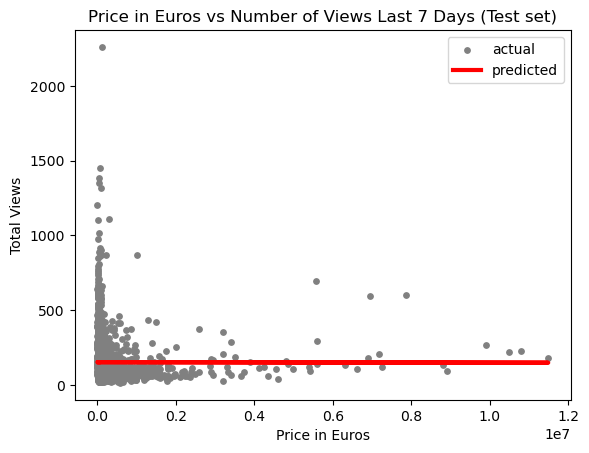

In [37]:
# creating a scatterplot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15, label='actual')
plot_test.plot(X_test, y_predicted, color='red', linewidth =3, label='predicted')
plot_test.title('Price in Euros vs Number of Views Last 7 Days (Test set)')
plot_test.xlabel('Price in Euros')
plot_test.ylabel('Total Views')
plot_test.legend()
plot_test.show()

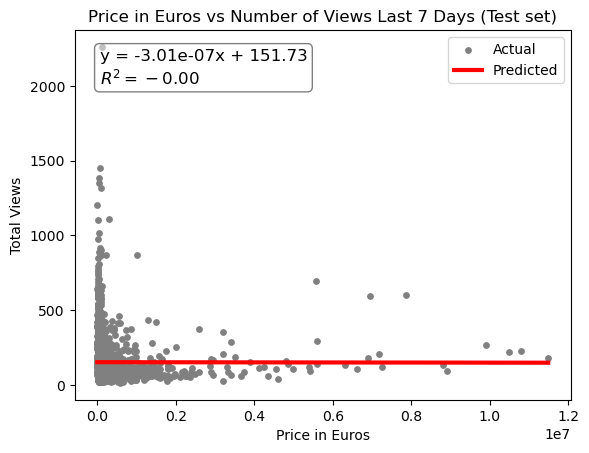

In [39]:
# This is mentor's code for showing the equations that go into this chart
# Extract the slope (coefficient) as a scalar
slope = regression.coef_.item()

# Extract the intercept as a scalar
intercept = regression.intercept_.item() if isinstance(regression.intercept_, np.ndarray) else regression.intercept_

# Calculate R-squared value
r_squared = regression.score(X_test, y_test)

# Create the equation string
equation = f'y = {slope:.2e}x + {intercept:.2f}'

# Sort X_test and y_predicted for a neat line plot
sorted_indices = np.argsort(X_test.flatten())  # Make sure X_test is flattened
X_test_sorted = X_test.flatten()[sorted_indices]
y_predicted_sorted = y_predicted[sorted_indices]

# Begin plotting
plot_test = plt

# Scatter plot for actual values
plot_test.scatter(X_test, y_test, color='gray', s=15, label='Actual')

# Line plot for the predicted values and regression line
plot_test.plot(X_test_sorted, y_predicted_sorted, color='red', linewidth=3, label='Predicted')

# Add the equation and R-squared to the plot
plot_test.text(0.05, 0.95, f'{equation}\n$R^2 = {r_squared:.2f}$', transform=plot_test.gca().transAxes,
               fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Set the title and labels
plot_test.title('Price in Euros vs Number of Views Last 7 Days (Test set)')
plot_test.xlabel('Price in Euros')
plot_test.ylabel('Total Views')

# Show legend
plot_test.legend()

# Display the plot
plot_test.show()

In [40]:
regression.coef_

array([[-3.01396542e-07]])

In [41]:
# creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # the mean squared error
r2 = r2_score(y_test, y_predicted) # the R2 score.

In [42]:
# printing the model summary statistics to evaluate the performance of the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.01396542e-07]]
Mean squared error:  19695.70351296327
R2 score:  -0.001160931928951836


Note: The slope is a negative value, meaning that as the price goes up the total views go down. The R2 value is negative so it is a very poor fit, but most of my variables for this lesson will be poor fits. For the sake of finishing this assignment I will continue with what I have.

In [43]:
y_predicted

array([[151.71797156],
       [151.61086126],
       [151.69777799],
       ...,
       [151.62845679],
       [151.72415019],
       [151.7155634 ]])

In [44]:
# creating a dataframe comparing the actual and predicted values of y

mini_data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
mini_data.head(10)

,Actual,Predicted
0,227,151.717972
1,368,151.610861
2,154,151.697778
3,89,151.695852
4,296,151.719479
5,44,151.691750
6,32,151.687832
7,52,151.693860
8,96,151.707147
9,53,151.627553


In [45]:
# comparing how the regression fits the training set, predicting X_train

y_predicted_train = regression.predict(X_train)

In [46]:
# checking summary statistics for training set
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.01396542e-07]]
Mean squared error:  25701.2713897842
R2 score:  3.5610006955399953e-06


Note: The slope is the same, and the R2 score as gone farther in the negative direction meaning it has not learned anything from the data, confirming the data is a poor fit for regression.

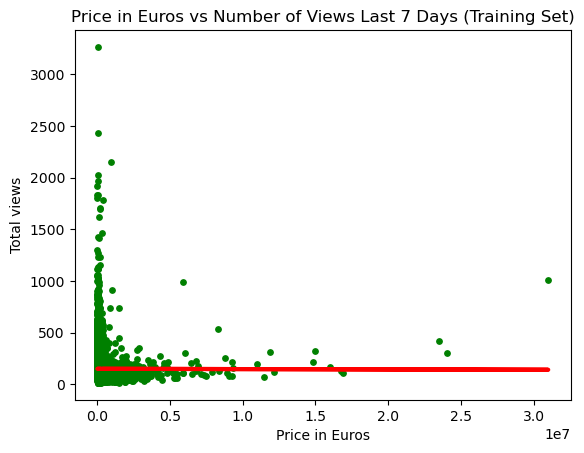

In [48]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price in Euros vs Number of Views Last 7 Days (Training Set)')
plot_test.xlabel('Price in Euros')
plot_test.ylabel('Total views')
plot_test.show()

### 2.A Does boat size have an impact on popularity? - Width

In [49]:
# creating a regression object.

regression2 = LinearRegression()

In [50]:
# fitting the regression object onto the training set.

regression2.fit(X2_train, y2_train)

LinearRegression()

In [51]:
# predicting the values of y using X.

y2_predicted = regression2.predict(X2_test)

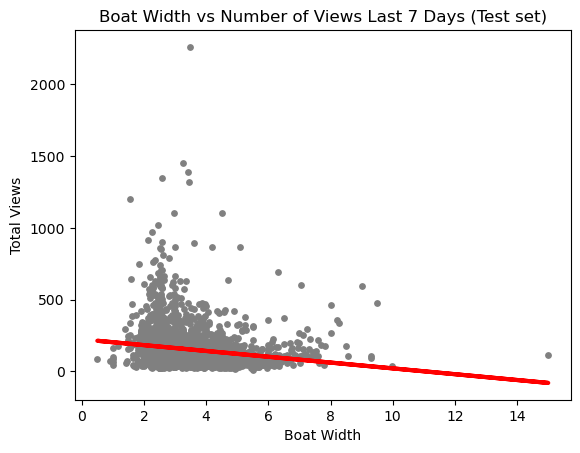

In [52]:
# creating a scatterplot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Boat Width vs Number of Views Last 7 Days (Test set)')
plot_test.xlabel('Boat Width')
plot_test.ylabel('Total Views')
plot_test.show()

In [53]:
# create objects that contain the model summary statistics.

rmse = mean_squared_error(y2_test, y2_predicted) # the mean squared error
r2 = r2_score(y2_test, y2_predicted) # the R2 score.

In [54]:
# printing the model summary statistics to evaluate the performance of the model

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-20.25626244]]
Mean squared error:  19011.17118263536
R2 score:  0.033634830777139024


In [55]:
y2_predicted

array([[158.72005644],
       [152.84574034],
       [146.56629898],
       ...,
       [136.43816776],
       [164.79693518],
       [158.72005644]])

In [56]:
# creating a dataframe comparing the actual and predicted values of y

mini_data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
mini_data2.head(10)

,Actual,Predicted
0,227,158.720056
1,368,152.845740
2,154,146.566299
3,89,160.543120
4,296,172.899440
5,44,140.489420
6,32,149.402176
7,52,164.796935
8,96,172.899440
9,53,138.666357


In [57]:
# comparing how the regression fits the training set, predicting X2_train

y2_predicted_train = regression2.predict(X2_train)

In [58]:
# checking summary statistics for training set
rmse = mean_squared_error(y2_train, y2_predicted_train)
r2 = r2_score(y2_train, y2_predicted_train)

In [59]:
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-20.25626244]]
Mean squared error:  25087.453442072354
R2 score:  0.023886261299704392


Note: This is the same as in the previous case. The slope is in the negative which means as the width of the boat increases the number of views decreases. The R2 score is also well below 1 and therefore a poor fit that is not learning anything from the data.

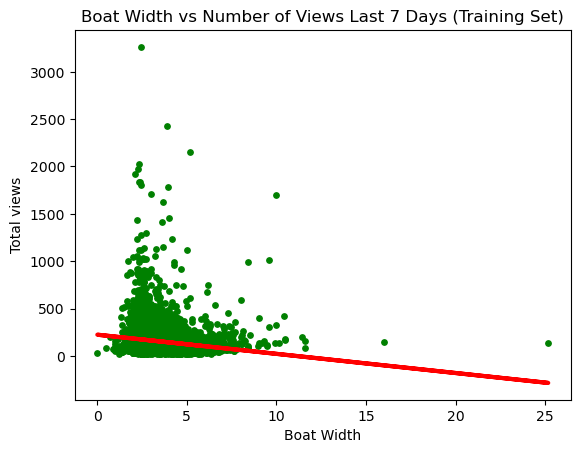

In [60]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X2_train, y2_train, color='green', s = 15)
plot_test.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test.title('Boat Width vs Number of Views Last 7 Days (Training Set)')
plot_test.xlabel('Boat Width')
plot_test.ylabel('Total views')
plot_test.show()

### 2.B Does boat size have an impact on popularity? - Length

In [61]:
# creating a regression object.

regression3 = LinearRegression()

In [62]:
# fitting the regression object onto the training set.

regression3.fit(X3_train, y3_train)

LinearRegression()

In [63]:
# predicting the values of y using X.

y3_predicted = regression3.predict(X3_test)

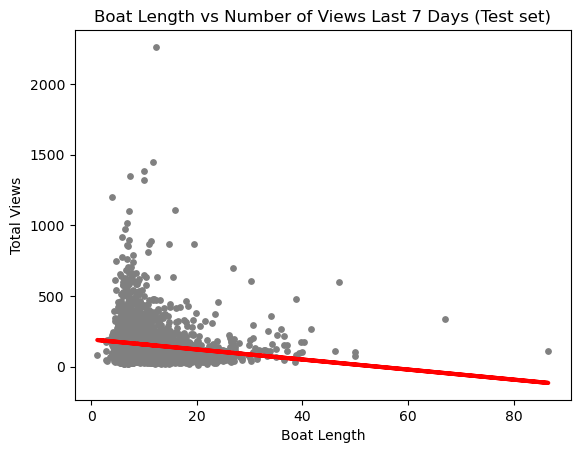

In [64]:
# creating a scatterplot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X3_test, y3_test, color='gray', s = 15)
plot_test.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_test.title('Boat Length vs Number of Views Last 7 Days (Test set)')
plot_test.xlabel('Boat Length')
plot_test.ylabel('Total Views')
plot_test.show()

In [65]:
# create objects that contain the model summary statistics.

rmse = mean_squared_error(y3_test, y3_predicted) # the mean squared error
r2 = r2_score(y3_test, y3_predicted) # the R2 score.

In [66]:
# printing the model summary statistics to evaluate the performance of the model

print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.55376188]]
Mean squared error:  19251.719830414273
R2 score:  0.021407397102272907


In [67]:
y3_predicted

array([[150.83456823],
       [152.2916106 ],
       [150.12381586],
       ...,
       [140.1732826 ],
       [162.91735861],
       [160.92725196]])

In [68]:
# creating a dataframe comparing the actual and predicted values of y

mini_data3 = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_predicted.flatten()})
mini_data3.head(10)

,Actual,Predicted
0,227,150.834568
1,368,152.291611
2,154,150.123816
3,89,152.824675
4,296,166.471120
5,44,147.636183
6,32,150.870106
7,52,159.363597
8,96,170.024882
9,53,144.366722


In [69]:
# comparing how the regression fits the training set, predicting X3_train

y3_predicted_train = regression3.predict(X3_train)

In [70]:
# checking summary statistics for training set
rmse = mean_squared_error(y3_train, y3_predicted_train)
r2 = r2_score(y3_train, y3_predicted_train)

In [71]:
print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.55376188]]
Mean squared error:  25245.279071383866
R2 score:  0.017745511883040632


Note: Same as all the other cases sadly. The slope is in the negative which means as boat length increases the number of views decreases. The R2 score is not even close to 1 and so this model is not learning anything from the data and this is a poor fit for regression.

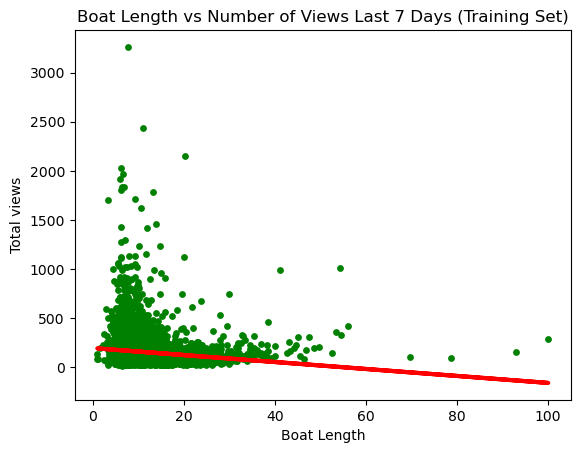

In [72]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X3_train, y3_train, color='green', s = 15)
plot_test.plot(X3_train, y3_predicted_train, color='red', linewidth =3)
plot_test.title('Boat Length vs Number of Views Last 7 Days (Training Set)')
plot_test.xlabel('Boat Length')
plot_test.ylabel('Total views')
plot_test.show()